# Imports

In [2]:
!pip install --upgrade seaborn==0.9.0
!pip install obspy
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import math as M
from matplotlib import mlab
from matplotlib.colors import Normalize
import requests
from lxml import html
from scipy import signal
import matplotlib.colors as colors
from scipy.fftpack import fft

%matplotlib inline

Requirement already up-to-date: seaborn==0.9.0 in c:\users\sam\anaconda3\lib\site-packages (0.9.0)


# URLs

In [3]:
OSCBEP_url_1 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/02/13/OO-HYEA2--YDH-2019-02-13T04:15:00.000000.mseed'
OSCBEP_url_2 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/02/13/OO-HYEA2--YDH-2019-02-13T13:10:00.000015.mseed'
OSCBEP_url_3 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/29/OO-HYEA2--YDH-2019-01-29T13:40:00.000000.mseed'
OSCBEP_url_4 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/01/OO-HYEA2--YDH-2019-01-01T10:30:00.000015.mseed'

OOCBEP_url_1 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/03/07/OO-HYEA1--YDH-2019-03-07T15:45:00.000015.mseed'
OOCBEP_url_2 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/06/OO-HYEA1--YDH-2019-01-06T01:40:00.000000.mseed'
OOCBEP_url_3 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/02/OO-HYEA1--YDH-2019-01-02T01:40:00.000015.mseed'
OOCBEP_url_4 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/01/OO-HYEA1--YDH-2019-01-01T09:40:00.000000.mseed'

# Plotting PSD v.s. F for Oregon Shelf Cabled

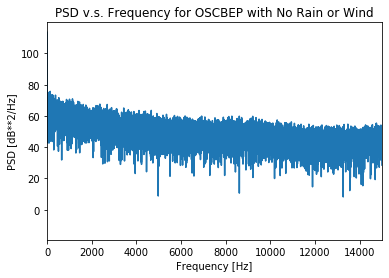

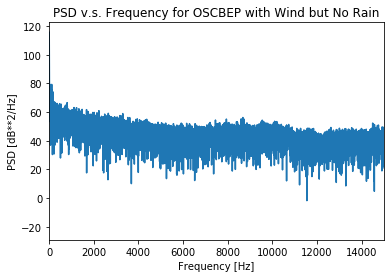

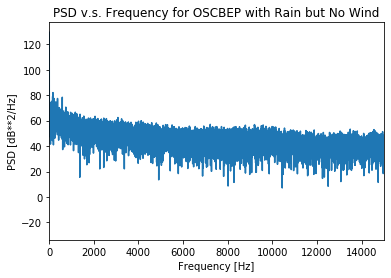

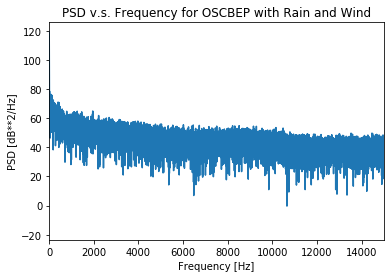

In [4]:
OSCBEP_st_1 = read(OSCBEP_url_1)
fs = OSCBEP_st_1[0].stats.sampling_rate
t_start = OSCBEP_st_1[0].stats.starttime
t_end = OSCBEP_st_1[0].stats.starttime + 1
sliced = OSCBEP_st_1.slice(t_start, t_end)
x = (sliced[0].data)*np.hanning(len(sliced[0].data))

xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.title('PSD v.s. Frequency for OSCBEP with No Rain or Wind')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)
plt.show()

OSCBEP_st_2 = read(OSCBEP_url_2)
fs = OSCBEP_st_2[0].stats.sampling_rate
t_start = OSCBEP_st_2[0].stats.starttime
t_end = OSCBEP_st_2[0].stats.starttime + 1
sliced = OSCBEP_st_2.slice(t_start, t_end)
x = (sliced[0].data)*np.hanning(len(sliced[0].data))

xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.title('PSD v.s. Frequency for OSCBEP with Wind but No Rain')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)
plt.show()

OSCBEP_st_3 = read(OSCBEP_url_3)
fs = OSCBEP_st_3[0].stats.sampling_rate
t_start = OSCBEP_st_3[0].stats.starttime
t_end = OSCBEP_st_3[0].stats.starttime + 1
sliced = OSCBEP_st_3.slice(t_start, t_end)
x = (sliced[0].data)*np.hanning(len(sliced[0].data))

xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.title('PSD v.s. Frequency for OSCBEP with Rain but No Wind')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)
plt.show()

OSCBEP_st_4 = read(OSCBEP_url_4)
fs = OSCBEP_st_4[0].stats.sampling_rate
t_start = OSCBEP_st_4[0].stats.starttime
t_end = OSCBEP_st_4[0].stats.starttime + 1
sliced = OSCBEP_st_4.slice(t_start, t_end)
x = (sliced[0].data)*np.hanning(len(sliced[0].data))

xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.title('PSD v.s. Frequency for OSCBEP with Rain and Wind')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)
plt.show()

# Plotting PSD v.s. F for Oregon Offshore Cabled

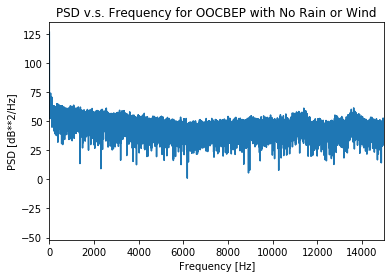

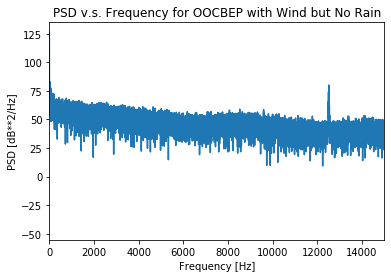

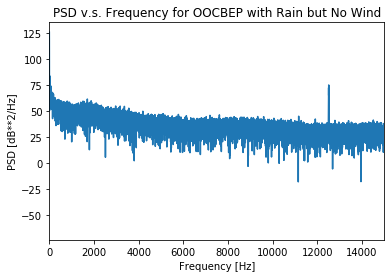

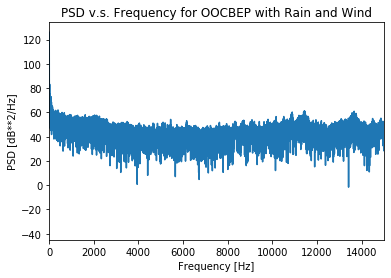

In [5]:
OOCBEP_st_1 = read(OOCBEP_url_1)
fs = OOCBEP_st_1[0].stats.sampling_rate
t_start = OOCBEP_st_1[0].stats.starttime
t_end = OOCBEP_st_1[0].stats.starttime + 1
sliced = OOCBEP_st_1.slice(t_start, t_end)
x = (sliced[0].data)*np.hanning(len(sliced[0].data))

xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.title('PSD v.s. Frequency for OOCBEP with No Rain or Wind')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)
plt.show()

OOCBEP_st_2 = read(OOCBEP_url_2)
fs = OOCBEP_st_2[0].stats.sampling_rate
t_start = OOCBEP_st_2[0].stats.starttime
t_end = OOCBEP_st_2[0].stats.starttime + 1
sliced = OOCBEP_st_2.slice(t_start, t_end)
x = (sliced[0].data)*np.hanning(len(sliced[0].data))

xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.title('PSD v.s. Frequency for OOCBEP with Wind but No Rain')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)
plt.show()

OOCBEP_st_3 = read(OOCBEP_url_3)
fs = OOCBEP_st_3[0].stats.sampling_rate
t_start = OOCBEP_st_3[0].stats.starttime
t_end = OOCBEP_st_3[0].stats.starttime + 1
sliced = OOCBEP_st_3.slice(t_start, t_end)
x = (sliced[0].data)*np.hanning(len(sliced[0].data))

xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.title('PSD v.s. Frequency for OOCBEP with Rain but No Wind')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)
plt.show()

OOCBEP_st_4 = read(OOCBEP_url_4)
fs = OOCBEP_st_4[0].stats.sampling_rate
t_start = OOCBEP_st_4[0].stats.starttime
t_end = OOCBEP_st_4[0].stats.starttime + 1
sliced = OOCBEP_st_4.slice(t_start, t_end)
x = (sliced[0].data)*np.hanning(len(sliced[0].data))

xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.title('PSD v.s. Frequency for OOCBEP with Rain and Wind')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)
plt.show()

# Spectrogram URLs

In [6]:
Spec_url_1 = 'https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T20:00:00.000015.mseed'
Spec_url_2 = 'https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/01/OO-AXVM1--YDH-2019-08-01T00:00:00.000015.mseed'
Spec_url_3 = 'https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/01/11/OO-AXVM1--YDH-2019-01-11T13:10:00.000016.mseed'

# Plotting Marine Mammal Noise Spectrogram

4000


(0, 5000)

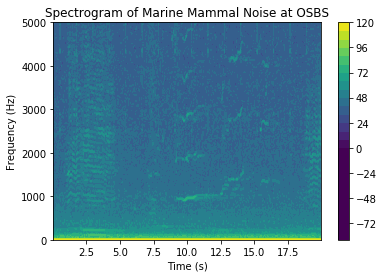

In [7]:
Spec_st_1 = read(Spec_url_1)
fs = Spec_st_1[0].stats.sampling_rate
t_start = Spec_st_1[0].stats.starttime 
t_end = Spec_st_1[0].stats.starttime + 20
sliced = Spec_st_1.slice(t_start, t_end)

npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)  
print(nfft)
per_lap = 0.90      
nlap = int(nfft * float(per_lap))   

specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.title('Spectrogram of Marine Mammal Noise at OSBS')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.ylim(0,5000)

# Plotting Airgun Noise Spectrogram

4000


(0, 10000)

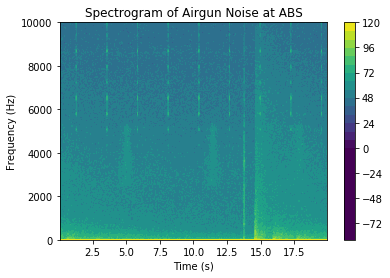

In [12]:
Spec_st_2 = read(Spec_url_2)
fs = Spec_st_2[0].stats.sampling_rate
t_start = Spec_st_2[0].stats.starttime 
t_end = Spec_st_2[0].stats.starttime + 20
sliced = Spec_st_2.slice(t_start, t_end)

npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)  
print(nfft)
per_lap = 0.90      
nlap = int(nfft * float(per_lap))   

specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.title('Spectrogram of Airgun Noise at ABS')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.ylim(0,10000)

# Plotting Earthquake Noise Spectrogram

4000


(0, 100)

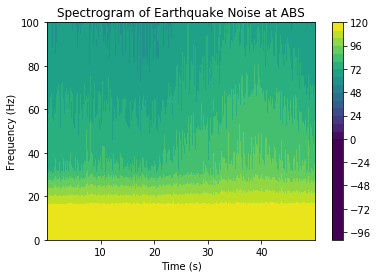

In [14]:
Spec_st_3 = read(Spec_url_3)
#Spec_st_3[0].plot()
fs = Spec_st_3[0].stats.sampling_rate
t_start = Spec_st_3[0].stats.starttime +154
t_end = Spec_st_3[0].stats.starttime + 204
sliced = Spec_st_3.slice(t_start, t_end)

npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)  
print(nfft)
per_lap = 0.90      
nlap = int(nfft * float(per_lap))   

specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.title('Spectrogram of Earthquake Noise at ABS')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.ylim(0,100)